In [1]:
# If you haven't installed the bwb package yet, run the following command
# !pip install git+https://github.com/ottomossei/bwb
import warnings
warnings.simplefilter('ignore')

## import modules

In [2]:
from bwb.db import LocalDB
import bwb.basicstrategy as bst
import bwb.indicator as indicator

Loading BokehJS ...

## Load candlestick

In [3]:
issue = 'AAPL'
d = LocalDB()
candle = d.loader(issue, start = '2020-01-01', end = '2020-05-01')
candle

AAPL


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,74.207466,135480400.0
2020-01-03,74.287498,75.144997,74.125000,74.357498,73.486023,146322800.0
2020-01-06,73.447502,74.989998,73.187500,74.949997,74.071579,118387200.0
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.723213,108872000.0
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.909149,132079200.0
...,...,...,...,...,...,...
2021-07-23,147.550003,148.720001,146.919998,148.559998,148.559998,71361600.0
2021-07-26,148.270004,149.830002,147.699997,148.990005,148.990005,72269700.0
2021-07-27,149.119995,149.210007,145.550003,146.770004,146.770004,103580300.0


## Select basic strategy

In [4]:
# MACD Cross Strategy
strategy = bst.MACDCross


## Select parameters of indicator

In [5]:
print(strategy.base_indicator_params())
indicator_params = {'n1': 12, 'n2': 26, 'ns': 9}

{'n1': array([ 6, 12, 18]), 'n2': array([13, 26, 39]), 'ns': array([ 5,  9, 15])}


## Set parameter and candle

In [6]:
strategy.candle = candle
strategy.indicator_params = indicator_params

## backtest

In [7]:
output = d.runsaver(strategy)

## Show with mplfinance

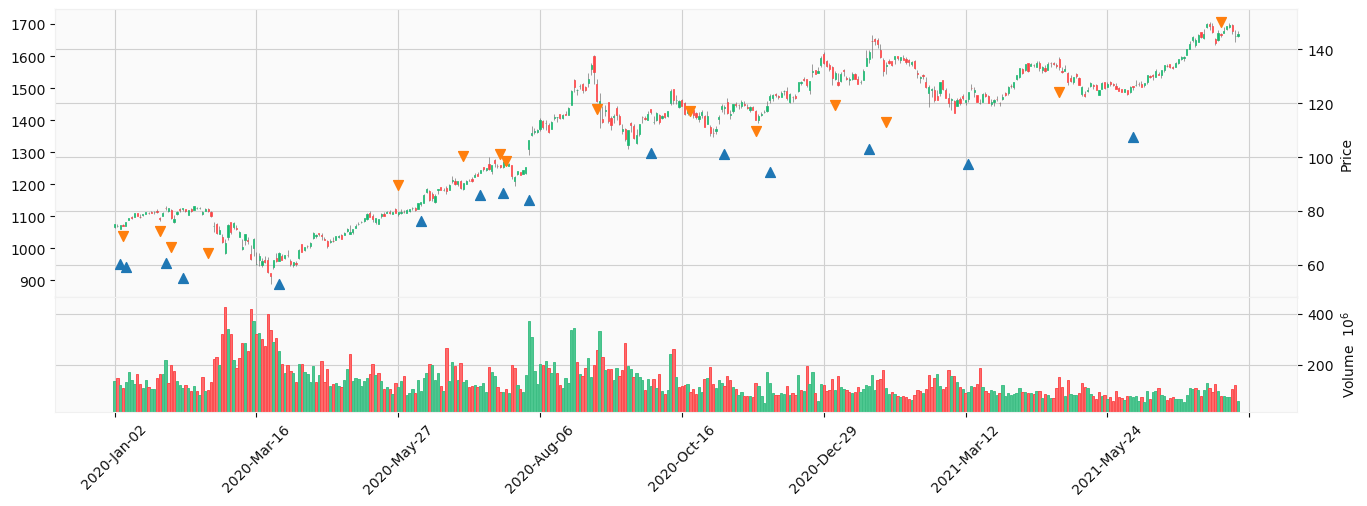

In [8]:
import mplfinance as mpf
import pandas as pd
buy = pd.DataFrame(data = output['_equity_curve']['Equity'][output['_trades']['EntryBar']]*0.95, index=output['_equity_curve'].index)
sell = pd.DataFrame(data = output['_equity_curve']['Equity'][output['_trades']['ExitBar']]*1.05, index=output['_equity_curve'].index)
# Show with Jupyter Notebook
apds = [mpf.make_addplot(buy,type='scatter',markersize=50,marker='^'),
        mpf.make_addplot(sell,type='scatter',markersize=50,marker='v')]

mpf.plot(candle, type='candle', figratio=(12,4),
         volume=True, style='yahoo', addplot=apds)